In [1]:
import tabix
YRI_file = "./data/YRI.low_coverage.2010_09.genotypes.vcf.gz"
yri = tabix.Tabix(YRI_file)

In [2]:
import tabix
import pandas as pd

In [3]:
rs3094315 = yri.query("1", 752566, 752567)
for record in rs3094315:
    print(record)

In [4]:
import pandas as pd

#ann = pd.read_table('./data/genome_Hong_ChangBum_v2_Full_20190106202606.txt', 
#                               comment='#', names=['rsid', 'chrom', 'pos', 'genotype'], low_memory=False)
ann = pd.read_table('./data/dm_23andme_v3_110219.txt', 
                               comment='#', names=['rsid', 'chrom', 'pos', 'genotype'], low_memory=False)
print("The 23andMe datset has {} rows and {} columns.".format(ann.shape[0], ann.shape[1]))
ann.head()

The 23andMe datset has 966977 rows and 4 columns.


,rsid,chrom,pos,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,AG
2,rs3131972,1,742584,AG
3,rs12124819,1,766409,--
4,rs11240777,1,788822,AG


In [5]:
ann.shape

(966977, 4)

In [21]:
#anon = ann[(ann.chrom == "22")]
ann = ann.iloc[0:1000,:]
ann.head()

,rsid,chrom,pos,genotype,genotype_1kg_format
0,rs4477212,1,72017,AA,None
1,rs3094315,1,742429,AG,0|1
2,rs3131972,1,742584,AG,0|1
3,rs12124819,1,766409,--,None
4,rs11240777,1,788822,AG,None


In [22]:
ann.shape

(1000, 5)

In [23]:
def convert_anon_genotype(chrom, pos, genotype, vcf_tabix):
    try:
        site = vcf_tabix.query(chrom, pos - 1, pos)
    except:
        return None
    
    ref=''
    alt=''

    for row in site:
        
        ref = row[3]
        alt = row[4]
        #print("%s-%s %s %s %s"%(chrom,pos,genotype,ref,alt))
        if genotype == ref+ref:
            return("0|0")
        elif (genotype == ref+alt) | (genotype == alt+ref):
            return("0|1")
        elif genotype == alt+alt:
            return("1|1")
        else:
            return("0|0")

In [24]:
genotypes_1kg_format = []
for chrom, pos, genotype in zip(ann['chrom'], ann['pos'], ann['genotype']):
    genotypes_1kg_format.append(convert_anon_genotype(str(chrom), pos, genotype, yri))
    
ann['genotype_1kg_format'] = genotypes_1kg_format

In [25]:
#ann

In [26]:
#print(ann.shape)

## 참조 인구 집단 데이터 만들기

In [27]:
yri_genotypes = pd.DataFrame({"population": "YRI","sample": ["YRI" + str(i) for i in range(1, 60)]})
yri_genotypes.head()

,population,sample
0,YRI,YRI1
1,YRI,YRI2
2,YRI,YRI3
3,YRI,YRI4
4,YRI,YRI5


In [28]:
def extract_genotype(chrom, pos, vcf_tabix):    
    g = ''
    try:
        site = vcf_tabix.query(chrom, pos - 1, pos)
        for row in site:
            #print(row)
            g = row[9:]
            g = [i.split(":")[0] for i in g]
            return(g)
    except:
        return None

## CEU & CHBJPT

In [29]:
YRI_file = "./data/YRI.low_coverage.2010_09.genotypes.vcf.gz"
yri = tabix.Tabix(YRI_file)
rs3094315 = yri.query("22", 49549881, 49549882)
for record in rs3094315:
    number_yri_samples = len(record[9:])
    print(len(record[9:]))
yri_genotypes = pd.DataFrame({"population": "YRI","sample": ["YRI" + str(i) for i in range(1, number_yri_samples + 1)]})
yri_genotypes

59


,population,sample
0,YRI,YRI1
1,YRI,YRI2
2,YRI,YRI3
3,YRI,YRI4
4,YRI,YRI5
5,YRI,YRI6
6,YRI,YRI7
7,YRI,YRI8
8,YRI,YRI9
9,YRI,YRI10


In [30]:
CEU_file = "./data/CEU.low_coverage.2010_09.genotypes.vcf.gz"
ceu = tabix.Tabix(CEU_file)
rs3094315 = ceu.query("22", 49549881, 49549882)
for record in rs3094315:
    number_ceu_samples = len(record[9:])
    print(len(record[9:]))
ceu_genotypes = pd.DataFrame({"population": "CEU","sample": ["CEU" + str(i) for i in range(1, number_ceu_samples + 1)]})
ceu_genotypes

60


,population,sample
0,CEU,CEU1
1,CEU,CEU2
2,CEU,CEU3
3,CEU,CEU4
4,CEU,CEU5
5,CEU,CEU6
6,CEU,CEU7
7,CEU,CEU8
8,CEU,CEU9
9,CEU,CEU10


In [31]:
CHBJPT_file = "./data/CHBJPT.low_coverage.2010_09.genotypes.vcf.gz"
chbjpt = tabix.Tabix(CHBJPT_file)
rs3094315 = ceu.query("22", 49549881, 49549882)
for record in rs3094315:
    number_chbjpt_samples = len(record[9:])
    print(len(record[9:]))
chbjpt_genotypes = pd.DataFrame({"population": "CHBJPT", "sample": ["CHBJPT" + str(i) for i in range(1, number_chbjpt_samples + 1)]})
chbjpt_genotypes


60


,population,sample
0,CHBJPT,CHBJPT1
1,CHBJPT,CHBJPT2
2,CHBJPT,CHBJPT3
3,CHBJPT,CHBJPT4
4,CHBJPT,CHBJPT5
5,CHBJPT,CHBJPT6
6,CHBJPT,CHBJPT7
7,CHBJPT,CHBJPT8
8,CHBJPT,CHBJPT9
9,CHBJPT,CHBJPT10


In [32]:
#yri_genotypes=yri_genotypes.iloc[0:10, 0:7]
#ceu_genotypes=ceu_genotypes.iloc[0:10, 0:7]
#chbjpt_genotypes=chbjpt_genotypes.iloc[0:10, 0:7]

In [33]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, ceu)
    
    if g != None:
        ceu_genotypes[rsid] = g

In [34]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, chbjpt)
    
    if g != None:
        chbjpt_genotypes[rsid] = g

In [35]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, yri)
    if g != None:
        yri_genotypes[rsid] = g

In [36]:
#for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
#    yri_genotypes[rsid] =  extract_genotype(str(chrom), pos, yri)
#    ceu_genotypes[rsid] =  extract_genotype(str(chrom), pos, ceu)
#    chbjpt_genotypes[rsid] =  extract_genotype(str(chrom), pos, chbjpt)

In [37]:
print("The dataframe including all of the samples from the YRI population has {} samples and {} genotypes.".format(yri_genotypes.shape[0], yri_genotypes.shape[1] - 2))
yri_genotypes

The dataframe including all of the samples from the YRI population has 59 samples and 838 genotypes.


,population,sample,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,YRI,YRI1,0|1,0|1,1|0,0|1,0|0,0|0,0|0,1|1,...,1|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
1,YRI,YRI2,1|1,1|0,0|1,1|1,0|1,0|0,0|0,0|1,...,1|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
2,YRI,YRI3,1|0,1|0,1|1,0|0,1|0,1|0,0|0,1|1,...,0|0,1|0,1|0,1|0,0|0,0|0,0|0,0|0,1|0,0|0
3,YRI,YRI4,0|1,0|1,0|0,0|1,0|0,1|0,1|0,1|1,...,0|0,1|0,1|0,1|0,0|0,0|0,0|0,0|0,1|0,0|0
4,YRI,YRI5,1|0,1|0,1|0,1|0,1|0,0|0,0|0,0|1,...,0|0,1|1,1|1,1|1,0|0,0|1,0|1,0|1,1|0,0|1
5,YRI,YRI6,1|0,0|0,0|0,1|0,0|0,0|0,0|0,0|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
6,YRI,YRI7,0|1,0|1,1|0,0|1,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|0,0|0,1|0,0|1,0|0
7,YRI,YRI8,0|0,0|0,0|1,0|0,0|0,0|0,0|0,0|1,...,1|1,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
8,YRI,YRI9,1|1,1|1,0|1,0|1,0|1,0|1,0|0,1|1,...,1|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1
9,YRI,YRI10,1|1,1|0,0|0,0|1,1|0,0|0,0|0,1|1,...,1|0,1|1,0|0,0|1,0|0,0|1,0|0,0|1,0|0,1|0


In [38]:
#ceu_genotypes=ceu_genotypes.iloc[0:10, 0:7]
print("The dataframe including all of the samples from the CEU population has {} samples and {} genotypes.".format(yri_genotypes.shape[0], ceu_genotypes.shape[1] - 2))

ceu_genotypes

The dataframe including all of the samples from the CEU population has 59 samples and 851 genotypes.


,population,sample,rs3094315,rs3131972,rs12124819,rs11240777,rs4970383,rs4475691,rs7537756,rs13302982,...,rs12041796,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,CEU,CEU1,1|1,1|1,0|0,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
1,CEU,CEU2,1|1,1|1,0|1,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,1|1
2,CEU,CEU3,1|1,1|1,1|1,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
3,CEU,CEU4,1|1,1|1,0|1,0|0,0|0,0|0,0|0,1|1,...,0|0,0|1,0|1,0|1,0|0,0|0,0|0,0|0,0|1,0|0
4,CEU,CEU5,1|1,1|1,0|0,0|0,1|0,1|0,1|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
5,CEU,CEU6,1|0,1|0,1|0,0|1,0|0,0|0,0|0,1|1,...,0|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
6,CEU,CEU7,1|1,1|1,0|0,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|1
7,CEU,CEU8,1|1,1|1,0|0,0|0,1|0,0|0,0|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
8,CEU,CEU9,0|1,0|1,0|0,0|0,1|0,0|0,0|0,1|1,...,0|0,0|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|0
9,CEU,CEU10,1|0,1|0,0|0,1|1,1|0,0|0,0|0,1|1,...,1|0,0|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1


In [39]:
print("The dataframe including all of the samples from the CHBJPT population has {} samples and {} genotypes.".format(chbjpt_genotypes.shape[0], chbjpt_genotypes.shape[1] - 2))
chbjpt_genotypes

The dataframe including all of the samples from the CHBJPT population has 60 samples and 807 genotypes.


,population,sample,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs2272756,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,CHBJPT,CHBJPT1,1|1,1|1,1|1,0|0,0|0,0|0,0|1,0|0,...,1|1,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
1,CHBJPT,CHBJPT2,1|1,1|1,0|1,0|0,0|0,1|0,1|0,0|0,...,0|0,1|1,1|1,1|1,1|0,1|0,0|0,1|0,0|1,1|0
2,CHBJPT,CHBJPT3,0|1,0|1,1|0,0|0,0|0,0|1,0|0,0|0,...,0|0,1|1,1|1,1|1,1|0,1|0,0|0,1|0,0|1,1|1
3,CHBJPT,CHBJPT4,0|1,0|1,0|0,1|0,1|0,1|1,1|1,0|0,...,1|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1
4,CHBJPT,CHBJPT5,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|0,...,0|0,1|1,1|1,1|1,0|1,0|1,0|0,0|1,1|0,0|1
5,CHBJPT,CHBJPT6,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|0,...,0|1,1|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
6,CHBJPT,CHBJPT7,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|0,...,0|0,1|1,1|1,1|1,1|1,1|1,0|0,1|1,0|0,1|1
7,CHBJPT,CHBJPT8,1|1,0|1,0|1,0|0,0|0,0|0,0|0,0|0,...,1|0,1|1,0|1,1|0,1|0,1|0,0|0,1|0,0|0,1|1
8,CHBJPT,CHBJPT9,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|0,...,0|0,1|1,0|1,1|0,1|0,1|0,0|0,1|0,0|0,1|1
9,CHBJPT,CHBJPT10,1|1,1|0,1|0,0|0,0|0,0|0,0|0,0|0,...,0|0,1|1,1|0,1|0,1|0,1|0,0|0,1|0,0|0,1|1


In [40]:
ceu_genotypes.shape

(60, 853)

In [41]:
yri_genotypes.shape

(59, 840)

In [42]:
chbjpt_genotypes.shape

(60, 809)

In [43]:
genotypes = ceu_genotypes.copy()
genotypes

,population,sample,rs3094315,rs3131972,rs12124819,rs11240777,rs4970383,rs4475691,rs7537756,rs13302982,...,rs12041796,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,CEU,CEU1,1|1,1|1,0|0,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
1,CEU,CEU2,1|1,1|1,0|1,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,1|1
2,CEU,CEU3,1|1,1|1,1|1,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
3,CEU,CEU4,1|1,1|1,0|1,0|0,0|0,0|0,0|0,1|1,...,0|0,0|1,0|1,0|1,0|0,0|0,0|0,0|0,0|1,0|0
4,CEU,CEU5,1|1,1|1,0|0,0|0,1|0,1|0,1|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
5,CEU,CEU6,1|0,1|0,1|0,0|1,0|0,0|0,0|0,1|1,...,0|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
6,CEU,CEU7,1|1,1|1,0|0,0|0,0|0,0|0,0|0,1|1,...,0|0,1|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|1
7,CEU,CEU8,1|1,1|1,0|0,0|0,1|0,0|0,0|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
8,CEU,CEU9,0|1,0|1,0|0,0|0,1|0,0|0,0|0,1|1,...,0|0,0|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|0
9,CEU,CEU10,1|0,1|0,0|0,1|1,1|0,0|0,0|0,1|1,...,1|0,0|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1


In [44]:
#genotypes = genotypes.append(yri_genotypes, ignore_index=True)
genotypes = genotypes.append(yri_genotypes,sort=True, ignore_index=True)
genotypes = genotypes.reindex(yri_genotypes.columns,axis=1)
genotypes
#genotypes = genotypes.append(chbjpt_genotypes, ignore_index=True)

,population,sample,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,CEU,CEU1,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|1,...,1|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
1,CEU,CEU2,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|0,...,1|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,1|1
2,CEU,CEU3,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|1,...,1|1,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
3,CEU,CEU4,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|1,...,0|0,0|1,0|1,0|1,0|0,0|0,0|0,0|0,0|1,0|0
4,CEU,CEU5,1|1,1|1,1|0,1|0,1|0,1|1,1|1,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
5,CEU,CEU6,1|0,1|0,0|0,0|0,0|0,1|1,1|1,1|1,...,1|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
6,CEU,CEU7,1|1,1|1,0|0,0|0,0|0,1|1,0|1,1|1,...,0|1,1|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|1
7,CEU,CEU8,1|1,1|1,1|0,0|0,0|0,1|1,1|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
8,CEU,CEU9,0|1,0|1,1|0,0|0,0|0,1|1,1|1,1|1,...,0|1,0|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|0
9,CEU,CEU10,1|0,1|0,1|0,0|0,0|0,1|1,1|1,1|1,...,0|0,0|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1


In [45]:
genotypes = genotypes.append(chbjpt_genotypes, sort=True, ignore_index=True)
genotypes = genotypes.reindex(yri_genotypes.columns,axis=1)
genotypes

,population,sample,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,CEU,CEU1,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|1,...,1|0,1|1,0|0,0|1,0|0,0|1,0|1,0|1,0|0,1|1
1,CEU,CEU2,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|0,...,1|0,1|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,1|1
2,CEU,CEU3,1|1,1|1,0|0,0|0,0|0,1|1,1|1,0|1,...,1|1,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1
3,CEU,CEU4,1|1,1|1,0|0,0|0,0|0,1|1,1|1,1|1,...,0|0,0|1,0|1,0|1,0|0,0|0,0|0,0|0,0|1,0|0
4,CEU,CEU5,1|1,1|1,1|0,1|0,1|0,1|1,1|1,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
5,CEU,CEU6,1|0,1|0,0|0,0|0,0|0,1|1,1|1,1|1,...,1|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|0
6,CEU,CEU7,1|1,1|1,0|0,0|0,0|0,1|1,0|1,1|1,...,0|1,1|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|1
7,CEU,CEU8,1|1,1|1,1|0,0|0,0|0,1|1,1|0,1|1,...,0|0,1|1,0|0,1|1,0|0,1|1,1|1,1|1,0|0,1|1
8,CEU,CEU9,0|1,0|1,1|0,0|0,0|0,1|1,1|1,1|1,...,0|1,0|1,0|0,1|0,0|0,1|0,1|0,1|0,0|0,1|0
9,CEU,CEU10,1|0,1|0,1|0,0|0,0|0,1|1,1|1,1|1,...,0|0,0|1,0|1,0|1,0|1,0|1,0|0,0|1,0|0,0|1


In [46]:
print("Now the genotypes data frame has %s samples and %s genotypes"%(genotypes.shape[0], genotypes.shape[1]-2))

Now the genotypes data frame has 179 samples and 838 genotypes


In [47]:
#

## PCA

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

genotypes_only = genotypes.copy().iloc[:, 2:]
genotypes_only[genotypes_only == "1|1"] = 1
genotypes_only[genotypes_only == "0|1"] = 0.5
genotypes_only[genotypes_only == "0/1"] = 0.5
genotypes_only[genotypes_only == "1|0"] = 0.5
genotypes_only[genotypes_only == "0|0"] = 0.0

In [49]:
genotypes_only

,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,rs13303106,rs28415373,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,1,1,0,0,0,1,1,1,1,NaN,...,0.5,1,0,0.5,0,0.5,0.5,0.5,0,1
1,1,1,0,0,0,1,1,0.5,0.5,NaN,...,0.5,1,0.5,0.5,0.5,0.5,0,0.5,0,1
2,1,1,0,0,0,1,1,0.5,0.5,NaN,...,1,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,1,1,NaN,...,0,0.5,0.5,0.5,0,0,0,0,0.5,0
4,1,1,0.5,0.5,0.5,1,1,1,1,NaN,...,0,1,0,1,0,1,1,1,0,1
5,0.5,0.5,0,0,0,1,1,1,1,NaN,...,0.5,0.5,0,0,0,0,0,0,0,0.5
6,1,1,0,0,0,1,0.5,1,0.5,NaN,...,0.5,1,0,0.5,0,0.5,0.5,0.5,0,1
7,1,1,0.5,0,0,1,0.5,1,1,NaN,...,0,1,0,1,0,1,1,1,0,1
8,0.5,0.5,0.5,0,0,1,1,1,1,NaN,...,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0.5
9,0.5,0.5,0.5,0,0,1,1,1,1,NaN,...,0,0.5,0.5,0.5,0.5,0.5,0,0.5,0,0.5


In [50]:
# 지노타입 정보가 없는 경우 삭제한다.
genotypes_only = genotypes_only.dropna(axis=1)
genotypes_only

,rs3094315,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,rs13303106,rs13303010,...,rs7524800,rs10799180,rs6669278,rs10753358,rs16840701,rs4130940,rs4391636,rs3936238,rs12093951,rs4436359
0,1,1,0,0,0,1,1,1,1,1,...,0.5,1,0,0.5,0,0.5,0.5,0.5,0,1
1,1,1,0,0,0,1,1,0.5,0.5,0.5,...,0.5,1,0.5,0.5,0.5,0.5,0,0.5,0,1
2,1,1,0,0,0,1,1,0.5,0.5,0.5,...,1,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,1,1,1,...,0,0.5,0.5,0.5,0,0,0,0,0.5,0
4,1,1,0.5,0.5,0.5,1,1,1,1,1,...,0,1,0,1,0,1,1,1,0,1
5,0.5,0.5,0,0,0,1,1,1,1,1,...,0.5,0.5,0,0,0,0,0,0,0,0.5
6,1,1,0,0,0,1,0.5,1,0.5,1,...,0.5,1,0,0.5,0,0.5,0.5,0.5,0,1
7,1,1,0.5,0,0,1,0.5,1,1,1,...,0,1,0,1,0,1,1,1,0,1
8,0.5,0.5,0.5,0,0,1,1,1,1,1,...,0.5,0.5,0,0.5,0,0.5,0.5,0.5,0,0.5
9,0.5,0.5,0.5,0,0,1,1,1,1,1,...,0,0.5,0.5,0.5,0.5,0.5,0,0.5,0,0.5


In [51]:
print("Now the genotypes data frame has %s samples and %s genotypes"%(genotypes_only.shape[0], genotypes_only.shape[1]-2))

Now the genotypes data frame has 179 samples and 706 genotypes


In [52]:
new_df=genotypes_only[genotypes_only.columns[1:12]]
new_df

,rs3131972,rs4970383,rs4475691,rs7537756,rs13302982,rs1110052,rs3748597,rs13303106,rs13303010,rs6696281,rs2340592
0,1,0,0,0,1,1,1,1,1,0,0
1,1,0,0,0,1,1,0.5,0.5,0.5,0,0
2,1,0,0,0,1,1,0.5,0.5,0.5,0,0
3,1,0,0,0,1,1,1,1,1,0,0
4,1,0.5,0.5,0.5,1,1,1,1,1,0,0
5,0.5,0,0,0,1,1,1,1,1,0,0
6,1,0,0,0,1,0.5,1,0.5,1,0,0
7,1,0.5,0,0,1,0.5,1,1,1,0,0
8,0.5,0.5,0,0,1,1,1,1,1,0,0
9,0.5,0.5,0,0,1,1,1,1,1,0,0


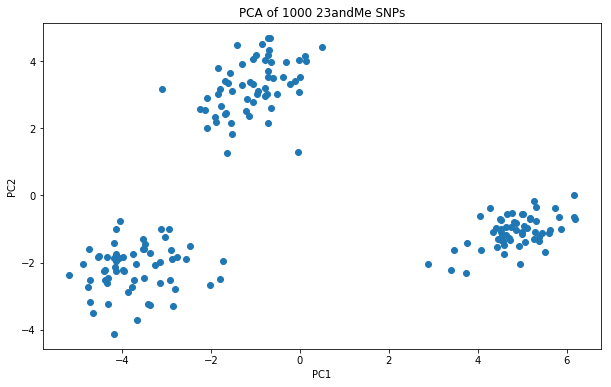

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

#pca.fit(new_df)
#pc = pca.transform(new_df)
pca.fit(genotypes_only)
pc = pca.transform(genotypes_only)

plt.figure(figsize=(10,6))
plt.scatter(pc[:, 0], pc[:, 1])
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [55]:
#

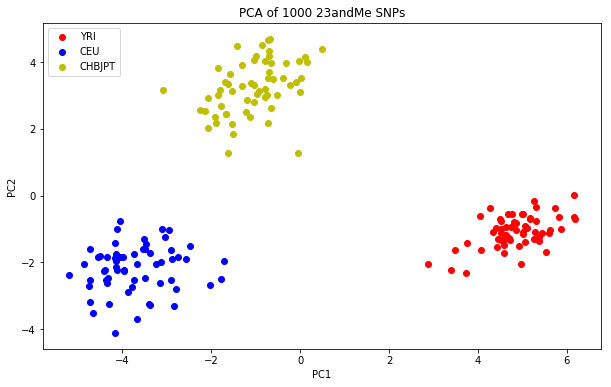

In [56]:
import numpy as np

plt.figure(figsize=(10,6))

for c, pop in zip("rby", ["YRI", "CEU", "CHBJPT"]):
    plt.scatter(pc[np.where(genotypes['population'] == pop), 0], pc[np.where(genotypes['population'] == pop), 1], c = c, label = pop)
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')
plt.show()

## Merge 23andMe 

In [57]:
ann = ann.loc[ann['rsid'].isin(genotypes_only.columns.values), :]
ann_genotypes = ann.copy()["genotype_1kg_format"]
ann

,rsid,chrom,pos,genotype,genotype_1kg_format
1,rs3094315,1,742429,AG,0|1
2,rs3131972,1,742584,AG,0|1
6,rs4970383,1,828418,CC,0|0
7,rs4475691,1,836671,CC,0|0
8,rs7537756,1,844113,AA,0|0
9,rs13302982,1,851671,GG,1|1
10,rs1110052,1,863421,GT,0|1
12,rs3748597,1,878522,CC,1|1
13,rs13303106,1,881808,AG,0|1
15,rs13303010,1,884436,AA,1|1


In [58]:
ann_genotypes[ann_genotypes == "1|1"] = 1
ann_genotypes[ann_genotypes == "0|1"] = 0.5
ann_genotypes[ann_genotypes == "1|0"] = 0.5
ann_genotypes[ann_genotypes == "0|0"] = 0.0
type(ann_genotypes)
#anon_genotypes
#ann_genotypes = ann_genotypes.reshape(1,-1)

#anon_pca = pca.transform(anon_genotypes)

pandas.core.series.Series

In [59]:
#type(ann_genotypes)
ann_genotypes
#anon_pca = pca.transform(ann_genotypes)
ann_genotypes = ann_genotypes.as_matrix().reshape(1,-1)
#anon_pca = pca.transform(ann_genotypes)


/Users/hongchangbum/miniconda2/envs/hail/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [60]:
ann_genotypes

array([[0.5, 0.5, 0.0, 0.0, 0.0, 1, 0.5, 1, 0.5, 1, 0.0, 0.0, 0.5, 1, 1,
        1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 0.0, 0.5, 0.5, 0.0, 0.5, 0.0,
        0.5, 0.5, 0.0, 0.5, 1, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0,
        0.5, 0.0, 0.5, 1, 0.5, 1, 1, 1, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.0, 1, 0.0, 0.0, 0.5, 1, 0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5,
        0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0,
        0.0, 1, 1, 1, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 1, 0.5, 0.5, 0.0, 0.5, 0.5,
        0.0, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 

In [61]:
anon_pca = pca.transform(ann_genotypes)

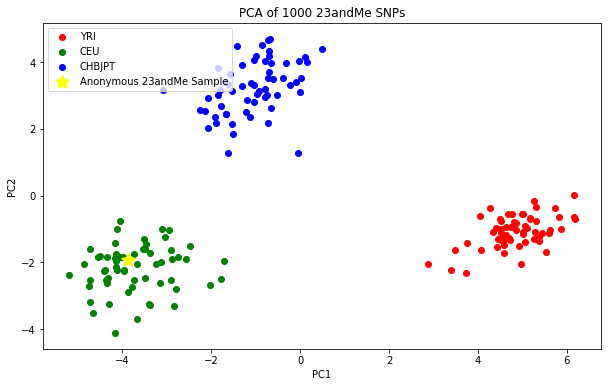

In [62]:
plt.figure(figsize=(10,6))
    
for c, pop in zip("rgb", ["YRI", "CEU", "CHBJPT"]):
    plt.scatter(pc[np.where(genotypes['population'] == pop), 0], pc[np.where(genotypes['population'] == pop), 1], c = c, label = pop)
    
# take the code above and add in the anonymous sample
    
plt.scatter(anon_pca[0,0], anon_pca[0,1], c = "yellow", label = "Anonymous 23andMe Sample", marker = (5,1,0), s = 200)
    
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')
plt.show()